In [3]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline 
import torchvision
import torch
from torchvision.transforms import transforms
import scipy

In [1276]:
data = torchvision.datasets.MNIST(root='',
                                        download=False, transform=transforms.ToTensor())
f_data = torchvision.datasets.FashionMNIST(root='',
                                        download=False, transform=transforms.ToTensor())

k_data = torchvision.datasets.KMNIST(root='',
                                        download=False, transform=transforms.ToTensor())

In [1284]:
mnist = (k_data[100][0].reshape((28,28)).numpy()*255).astype(np.uint8)


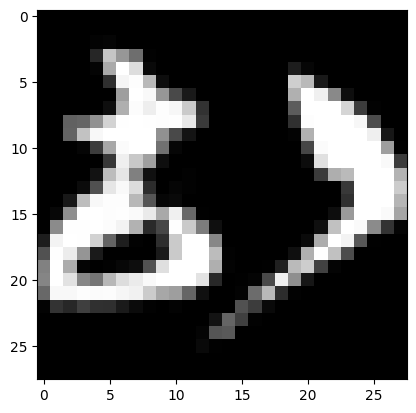

In [1285]:
plt.imshow(mnist, cmap="gray")

In [823]:
print(mnist)

[[  0   0   0   0   0   0   0   0  58 121 218 110  58  42  54  85 176 228
  121  33   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  18  66 129 148 121 149 254 255 255 255 255 187  87
  126 142 113  46   0   0   0   0   0   0]
 [  0   0   4   0  82 239 207 180 162 159 143 154 180 176 176 145 127 155
  154 165 191 219 183  41   0   0   0   0]
 [  0   0   0   0 119 138  63  69  75  76  75  65  63  63  62  66  77  77
   78  71  49  88 167  94   0   0   0   0]
 [  0   0   0  62 240 145 172 178 186 186 184 185 183 183 184 186 186 182
  193 193 197 145 121 174   0   0   0   0]
 [  0   0   0  30 143 147 185 142 112 104 104 101  99  98  96  94  98  98
   95 112 143 196 206 173   0   0   0   0]
 [  0   0   0 101 180  99 104 121 153 148 146 147 147 145 147 145 136 139
  153 153 118  87  58 148  38   0   0   0]
 [  0   0   0 133 198 206 201 149  95  93  92  91  88  88  88  92  99 100
   90 102 186 217 183 250  66   0   0   0]
 [  0   0   0 114 142 152 144 117 167 177 177 178 181 181 185 18

In [222]:
conv_kernel = np.array([[0,3,0],
                      [3,0,3],
                      [0,3,0]])

In [223]:
#result = cv2.filter2D(mnist, -1, conv_kernel/16)
result = scipy.ndimage.convolve(mnist, conv_kernel*4)

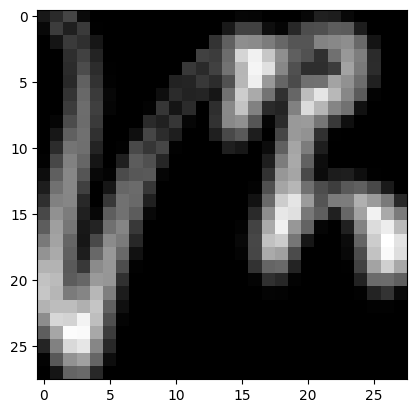

In [224]:
plt.imshow(result, cmap="gray")

In [23]:
print(result[1:,2:])

[[ 62  35   6   0   0   0   0   0   0   0   0   4  27  58  54  23  13  32
   64  95 101  71  29   5   0   0]
 [ 52  54  19   0   0   0   0   0   0   0   8  34  90 156 158 103  79  92
  103 116 144 150  89  21   0   0]
 [ 39  69  33   0   0   0   0   0   0   8  38  74 123 197 228 199 156 105
   61  49  96 164 131  38   0   0]
 [ 40  81  42   1   0   0   0   0   5  32  67  70  94 183 242 223 147  68
   43  39  70 146 134  41   0   0]
 [ 44  91  50   3   0   0   0   2  21  51  56  35  78 185 229 173  86  65
  118 132 131 157 111  28   0   0]
 [ 49 104  60   5   0   0   0  13  39  46  23  27 108 199 186  96  47 102
  192 215 193 149  66  10   0   0]
 [ 55 112  62   4   0   0   8  34  47  26   4  41 144 194 124  36  37 130
  203 193 150  85  23   0   0   0]
 [ 68 113  54   1   0   3  27  55  40   9   0  44 139 155  69   9  44 144
  172 102  47  21   3   0   0   0]
 [ 92 114  45   0   0  19  56  59  23   1   0  28  82  81  29   4  61 158
  145  46   1   0   0   0   0   0]
 [117 110  34   0  

In [1303]:
tb_in = open("output.txt", "w")
tb_in.write(str(mnist.reshape(784)[0]))
for entry in mnist.reshape(784)[1:]: 
    # print(entry)
    tb_in.write("\n" + str(entry))
tb_in.close()

### --- Testbench output ---

In [6]:
tb_out = open("output.txt", "r")
out = tb_out.read()
tb_out.close()

In [7]:
out_arr = (np.fromstring(out, sep = '\n')).reshape(28,28)

In [263]:
out_arr = (np.fromstring(out, sep = '\n')[:-6]).reshape(28,28)

ValueError: cannot reshape array of size 778 into shape (28,28)

In [264]:
out_arr = np.append(np.fromstring(out, sep = '\n'), np.zeros(1)).reshape(26,26)

ValueError: cannot reshape array of size 785 into shape (26,26)

NameError: name 'result' is not defined

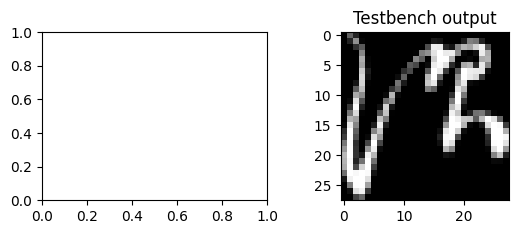

In [8]:
ax1 = plt.subplot(222)
ax1.imshow(out_arr, cmap="gray")
ax1.set_title("Testbench output")
ax2 = plt.subplot(221)
ax2.imshow(result[1:-1,1:-1], cmap="gray")
ax2.set_title("Correct output")
#print(result)
#print("\n-----------------\n")
#print(out_arr)

In [914]:
print("True:\n", result[1:-1, 2:])
print("TB:\n", out_arr)

True:
 [[  0   5  27  60  86 108 124 138 163 184 187 184 184 181 165 144 130 119
  101  76  44  16   2   0   0   0]
 [  1  18  75 130 142 137 135 130 135 152 165 167 163 150 132 123 127 133
  137 138 113  55  11   0   0   0]
 [  4  43 115 149 135 124 124 123 120 119 120 121 119 117 118 122 124 124
  125 137 138  90  25   0   0   0]
 [  9  65 138 155 145 142 139 138 136 134 132 131 131 133 135 136 139 142
  144 146 151 115  38   0   0   0]
 [ 13  72 135 151 150 148 140 136 134 133 132 131 130 129 129 130 134 142
  149 152 154 122  46   2   0   0]
 [ 22  89 144 149 142 135 128 124 122 121 120 119 119 118 118 119 123 131
  139 140 144 130  62   8   0   0]
 [ 30 105 161 168 156 139 129 127 127 126 126 126 127 128 129 129 129 132
  149 161 167 152  80  15   0   0]
 [ 34 109 158 168 164 155 148 146 144 143 142 142 143 143 144 146 148 147
  157 173 173 149  86  20   0   0]
 [ 40 119 166 172 162 158 156 149 145 143 142 142 144 145 145 147 156 157
  154 169 169 149 100  30   0   0]
 [ 41 120 17

### Image Augmentations

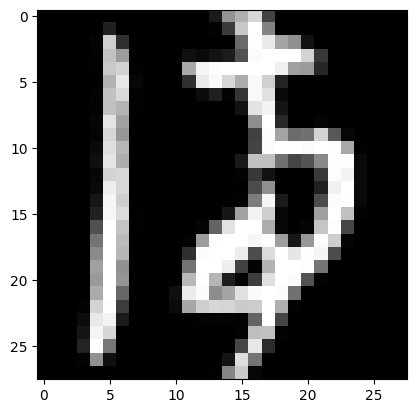

In [1586]:
mnist = (k_data[900][0].reshape((28,28)).numpy()*255).astype(np.uint8)
plt.imshow(mnist, cmap = 'grey')

In [1343]:
mnist_rot = np.zeros_like(mnist)
a = np.cos(np.deg2rad(-20))
b = np.sin(np.deg2rad(-20))
for x, row in enumerate(mnist):
    for y, el in enumerate(row):
        x_loc = x - 14
        y_loc = 14 - y 
        x_rot = np.round(a*x_loc - b*y_loc).astype(int) 
        y_rot = np.round(b*x_loc + a*y_loc).astype(int) 
        try:
            mnist_rot[x_rot+14, 14-y_rot] = el 
        except:
            continue

#### Inverse method!

In [1344]:
mnist_rot = np.zeros_like(mnist).astype(np.float64)
mnist_rot[:] = -1
a = np.cos(np.deg2rad(30))
b = np.sin(np.deg2rad(30))
for y_rot in range(28):
    for x_rot in range(28):
        x_loc = x_rot - 14
        y_loc = 14 - y_rot
        x = np.round(a*x_loc + b*y_loc).astype(int)
        y = np.round(-b*x_loc + a*y_loc).astype(int) 
        if (-14 <= x <= 14 and -14 <= y <= 14):
            try:
                mnist_rot[x_rot, y_rot] = mnist[14 + x, 14 - y]
            except:
                continue

In [1603]:
mnist_rot = np.zeros_like(mnist).astype(np.float64)
mnist_rot[:] = -1
a = 3547
b = 2048
for y_rot in range(28):
    for x_rot in range(28):
        x_loc = x_rot - 14
        y_loc = 14 - y_rot
        x = np.round((a*x_loc + b*y_loc) / 4096).astype(int)
        y = np.round((-b*x_loc + a*y_loc) / 4096).astype(int) 
        if (-14 <= x <= 14 and -14 <= y <= 14):
            try:
                mnist_rot[x_rot, y_rot] = mnist[14 + x, 14 - y]
            except:
                continue

In [1587]:
mnist_rot = np.zeros_like(mnist).astype(np.float64)
mnist_rot[:] = -1
theta = -39
a = np.cos(np.deg2rad(theta))
b = np.sin(np.deg2rad(theta))
mnist_rot = [-1] * 784
indices = [-1] * 784
for i in range(784):
    x_rot = i % 28
    y_rot = i // 28
    # print('(', x_rot, ',', y_rot, ')')
    x_loc = x_rot - 14
    y_loc = 14 - y_rot
    x = np.round((a*x_loc + b*y_loc)).astype(int)
    y = np.round((-b*x_loc + a*y_loc)).astype(int) 
    if (-13 <= x <= 14 and -13 <= y <= 14):
        # print(14-y, 14+x)
        mnist_rot[i] = (mnist.flatten()[(14 - y) * 28 + (14 + x)]) 
        indices[i] = (14 - y) * 28 + (14 + x)
            
mnist_rot = np.array(mnist_rot).reshape(28,28)
mnist_rot = mnist.flatten()[indices].reshape(28,28)


Text(0.5, 1.0, 'OG MNIST')

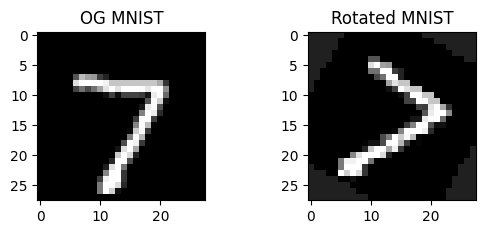

In [1604]:
ax1 = plt.subplot(222)
ax1.imshow(mnist_rot, cmap="gray")
ax1.set_title("Rotated MNIST")
ax2 = plt.subplot(221)
ax2.imshow(mnist, cmap="gray")
ax2.set_title("OG MNIST")

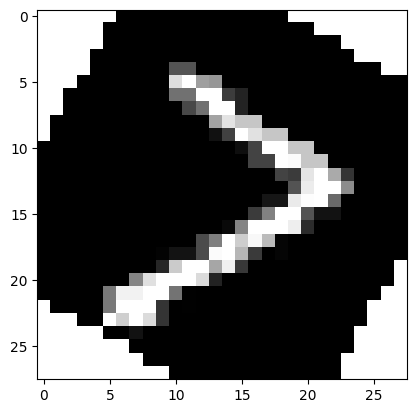

In [1605]:
import matplotlib
m_r = np.ma.masked_where(mnist_rot == -1, mnist_rot)
cmap.set_bad(color = 'white')
plt.imshow(m_r, cmap = 'grey')

In [1296]:
LUT = []
for i, el in enumerate(mnist.flatten()):
    bin = "10'b" + str(f"{i:b}")
    if (el == -1):
        data = "10'b0"
    else:
        data = "10'b" + str(f"{int(el):b}")
    line = bin + ': ' + 'pixel = ' + data + ';'
    print(line)
    

10'b0: pixel = 10'b0;
10'b1: pixel = 10'b0;
10'b10: pixel = 10'b0;
10'b11: pixel = 10'b0;
10'b100: pixel = 10'b0;
10'b101: pixel = 10'b0;
10'b110: pixel = 10'b0;
10'b111: pixel = 10'b0;
10'b1000: pixel = 10'b0;
10'b1001: pixel = 10'b0;
10'b1010: pixel = 10'b0;
10'b1011: pixel = 10'b0;
10'b1100: pixel = 10'b0;
10'b1101: pixel = 10'b0;
10'b1110: pixel = 10'b0;
10'b1111: pixel = 10'b0;
10'b10000: pixel = 10'b0;
10'b10001: pixel = 10'b0;
10'b10010: pixel = 10'b0;
10'b10011: pixel = 10'b0;
10'b10100: pixel = 10'b0;
10'b10101: pixel = 10'b0;
10'b10110: pixel = 10'b0;
10'b10111: pixel = 10'b0;
10'b11000: pixel = 10'b0;
10'b11001: pixel = 10'b0;
10'b11010: pixel = 10'b0;
10'b11011: pixel = 10'b0;
10'b11100: pixel = 10'b0;
10'b11101: pixel = 10'b0;
10'b11110: pixel = 10'b0;
10'b11111: pixel = 10'b0;
10'b100000: pixel = 10'b0;
10'b100001: pixel = 10'b0;
10'b100010: pixel = 10'b0;
10'b100011: pixel = 10'b0;
10'b100100: pixel = 10'b0;
10'b100101: pixel = 10'b0;
10'b100110: pixel = 10'b0;
10'b10011

In [1297]:
ct_out = open("rot_out.txt", "r")
r_out = ct_out.read()
ct_out.close()
# print(mnist_rot)

In [1298]:
out_arr = (np.fromstring(r_out, sep = '\n')[:784]).reshape(28,28)
# print(out_arr)

Text(0.5, 1.0, 'Python rotated MNIST')

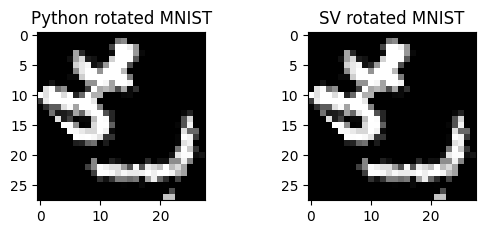

In [1299]:
ax1 = plt.subplot(222)
ax1.imshow(out_arr, cmap="gray")
ax1.set_title("SV rotated MNIST")
ax2 = plt.subplot(221)
ax2.imshow(mnist_rot, cmap="gray")
ax2.set_title("Python rotated MNIST")

In [1250]:
def generate_rotator_LUT(theta = 30):
    a = np.cos(np.deg2rad(theta))
    b = np.sin(np.deg2rad(theta))
    indices = [-1] * 784
    LUT = []    
    for i in range(784):
        x_rot = i % 28
        y_rot = i // 28
        x_loc = x_rot - 14
        y_loc = 14 - y_rot
        x = np.round((a*x_loc + b*y_loc)).astype(int)
        y = np.round((-b*x_loc + a*y_loc)).astype(int) 
        
        if (-13 <= x <= 14 and -13 <= y <= 14):
            indices[i] = (14 - y) * 28 + (14 + x)   
            
    for i, el in enumerate(indices):
        bin = "10'b" + str(f"{i:b}")
        if (el == -1):
            data = "10'b0"
        else:
            data = "10'b" + str(f"{int(el):b}")
        line = bin + ': ' + 'rot_addr = ' + data + ';'
        LUT.append(line)
    return LUT

In [1255]:
LUT = generate_rotator_LUT(-40)

In [1256]:
for line in LUT:
    print(line)

10'b0: rot_addr = 10'b0;
10'b1: rot_addr = 10'b0;
10'b10: rot_addr = 10'b0;
10'b11: rot_addr = 10'b0;
10'b100: rot_addr = 10'b0;
10'b101: rot_addr = 10'b0;
10'b110: rot_addr = 10'b0;
10'b111: rot_addr = 10'b0;
10'b1000: rot_addr = 10'b0;
10'b1001: rot_addr = 10'b10101001;
10'b1010: rot_addr = 10'b10101010;
10'b1011: rot_addr = 10'b10001111;
10'b1100: rot_addr = 10'b10001111;
10'b1101: rot_addr = 10'b1110100;
10'b1110: rot_addr = 10'b1011001;
10'b1111: rot_addr = 10'b1011010;
10'b10000: rot_addr = 10'b111111;
10'b10001: rot_addr = 10'b100011;
10'b10010: rot_addr = 10'b100100;
10'b10011: rot_addr = 10'b1001;
10'b10100: rot_addr = 10'b0;
10'b10101: rot_addr = 10'b0;
10'b10110: rot_addr = 10'b0;
10'b10111: rot_addr = 10'b0;
10'b11000: rot_addr = 10'b0;
10'b11001: rot_addr = 10'b0;
10'b11010: rot_addr = 10'b0;
10'b11011: rot_addr = 10'b0;
10'b11100: rot_addr = 10'b0;
10'b11101: rot_addr = 10'b0;
10'b11110: rot_addr = 10'b0;
10'b11111: rot_addr = 10'b0;
10'b100000: rot_addr = 10'b0;
10'b1000

### RandomResizeCrop time

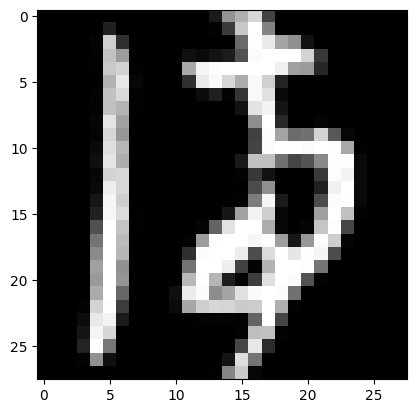

In [1545]:
plt.imshow(mnist, cmap = 'grey')

We ought to take a subset of the total range -- square?
So we have [x, 27-x] with x in [0, 27], and then conversely [y, 27-y]
But let's say we cap x and y at a smaller number, as large crops do not preserve semantic information

(18, 18)

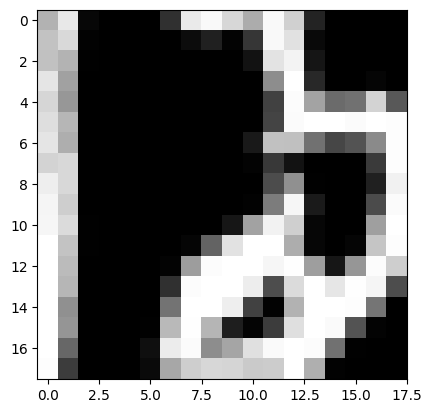

In [1555]:
c = 5
cropped_mnist = mnist[c:-c, c:-c]
plt.imshow(mnist[c:-c, c:-c], cmap = 'grey')
cropped_mnist.shape

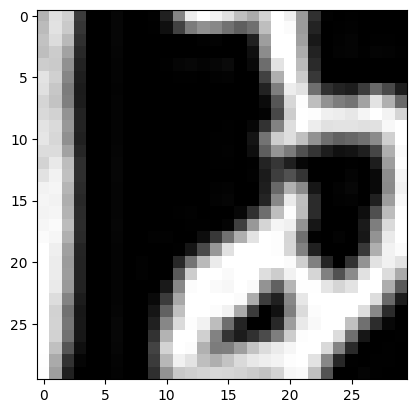

In [1556]:
plt.imshow(scipy.ndimage.zoom(cropped_mnist,28/(27-2*c)), cmap='grey')

### 1-to-1 correspondence?

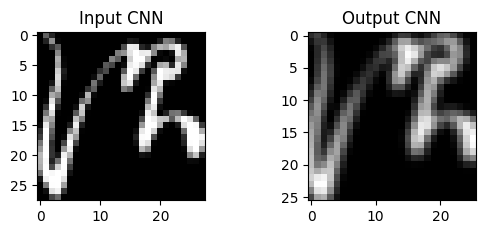

In [203]:
import Dataset
import KRIAInterface
import Config

config = Config.GetConfig()
dataset = Dataset.Dataset(**config["dataset"])

_, (batch, label) = next(enumerate(dataset.testingEnumeration()))

a = 4
weight = torch.tensor([[[[1,2,1], [2,4,2], [1,2,1]]]]) #outChannels, inChannels, kernelX, kernelY
out = KRIAInterface.FConv2D_3x3.apply(batch, weight, None)
ax1 = plt.subplot(222)
ax1.imshow(out[0][0], cmap="gray")
ax1.set_title("Output CNN")
ax2 = plt.subplot(221)
tb_in = open("output.txt", "w")
mnist = ((batch[0][0]*255).numpy()).astype(int)
tb_in.write(str(mnist.reshape(784)[0]))
for entry in mnist.reshape(784)[1:]: 
# print(entry)
    tb_in.write("\n" + str(entry))
tb_in.close()
ax2.imshow(batch[0][0], cmap="gray")
ax2.set_title("Input CNN")
plt.show()

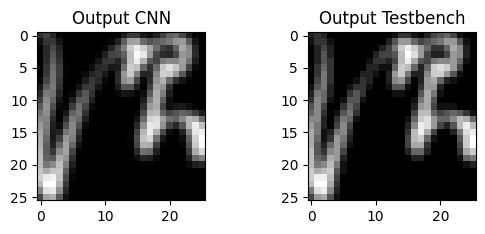

In [204]:
ax1 = plt.subplot(222)
ax1.imshow(out_arr, cmap="gray")
ax1.set_title("Output Testbench")
ax2 = plt.subplot(221)
ax2.imshow((out[0][0]), cmap="gray")
ax2.set_title("Output CNN")
out_cnn = ((out[0][0]).numpy())
#print((out[0][0]))
plt.show()
diff = out_cnn-out_arr
#print(out_cnn)
#print(out_arr)
#plt.imshow(result[:,1:], cmap="gray")

[[ 1.000000e+01 -8.750000e-01 -1.796875e-01 -3.750000e-01  0.000000e+00
   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
   0.000000e+00  0.000000e+00 -2.968750e-01 -7.109375e-01 -6.015625e-01
  -4.062500e-01 -4.453125e-01 -8.203125e-01 -4.687500e-02 -1.562500e-02
  -9.140625e-01 -2.890625e-01 -4.687500e-01 -8.515625e-01 -3.203125e-01
   0.000000e+00]
 [-1.953125e-01 -2.187500e-01 -3.828125e-01 -2.265625e-01  0.000000e+00
   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  -7.812500e-03 -5.078125e-01 -1.484375e-01 -6.406250e-01 -7.343750e-01
  -8.593750e-01 -4.140625e-01 -9.531250e-01 -7.812500e-01 -4.531250e-01
  -2.578125e-01 -3.125000e-02 -3.593750e-01 -5.703125e-01 -3.125000e-01
   0.000000e+00]
 [-1.875000e-01 -4.375000e-01 -3.281250e-01 -9.375000e-02 -1.562500e-02
   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  -5.312500e-01 -4.140625e-01 -6.640625e-01 -7.109375e-01 -3.437500e-01
  -3.046875e-01 -4.765625e-01 

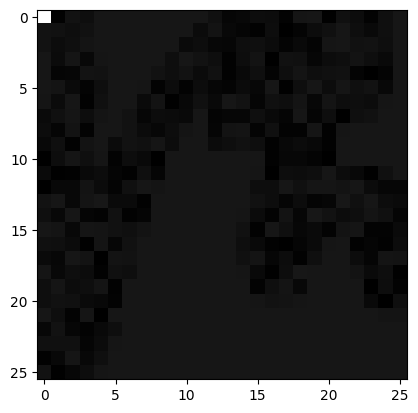

In [225]:
dd = out_arr - out_cnn
dd[0,0] = 10
plt.imshow(dd, cmap= 'gray')
print(dd)
#print(dd)
#print(out_cnn[:, 1:]-out_arr[:, :-1])
#print(np.round(out_cnn))
#print(out_cnn[:,1:][:8])
#print(out_arr[:8,:-1])
#
#print(out_cnn)
#print("-----------")
#print(out_arr)
#
